# Basic example using the MOSM, Conv, CSM and SM-LMC kernels
Here we show the basic usage of the toolkit using a contrived example dataset of three sinusoidal signals. The three sinusses are each put in a channel and have the same frequency but differ in phase. The observations are randomly picked in the range of [0,4], where the first channel will have the second half of the observations removed. Each of the kernels is being evaluated on the same dataset so that we can easily compare the results. Finally, a comparison is made between the different kernels and the errors they obtain.

In [1]:
# remove in the future
# should not be neccesary 
import sys
sys.path.insert(0, '../')

In [2]:
import mogptk
import numpy as np

# TODO: remove when done:
# %reload_ext autoreload
# %autoreload 2

## Generate dataset

In [3]:
data = mogptk.Data() # class for storing data

#Sine(6X) + Noise
x = np.sort(np.random.uniform(0, 4, 20))
y = np.sin(6*x) + np.random.normal(scale=0.03, size=x.shape)
data.add(x, y)

#Sine(6X+2) + Noise
x = np.sort(np.random.uniform(0, 4, 10))
y = np.sin(6*x + 2) + np.random.normal(scale=0.03, size=x.shape)
data.add(x, y)

#Sine(6X+2) - Sine(4X) + Noise
x = np.sort(np.random.uniform(0, 4, 10))
y = np.sin(6*x + 2) - np.sin(4*x) + np.random.normal(scale=0.03, size=x.shape)
data.add(x, y)

# remove observations with x > 2
data.remove_range(0, start=2.0, end=None)

# set true latent functions for comparison
data.set_latent_function(0, lambda x: np.sin(6*x))
data.set_latent_function(1, lambda x: np.sin(6*x+2))
data.set_latent_function(2, lambda x: np.sin(6*x+2)-np.sin(4*x))

## MOSM

In [5]:
kernel = mogptk.MOSM(data, components=3) # instantiate kernel
model_mosm = mogptk.Model(data, kernel)

# optimizers: 'adam', 'L-BFGS-B' 
model_mosm.optimize(optimizer='L-BFGS-B', maxiter=1000, learning_rate=0.001)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 23.298549
  Number of iterations: 877
  Number of functions evaluations: 1018


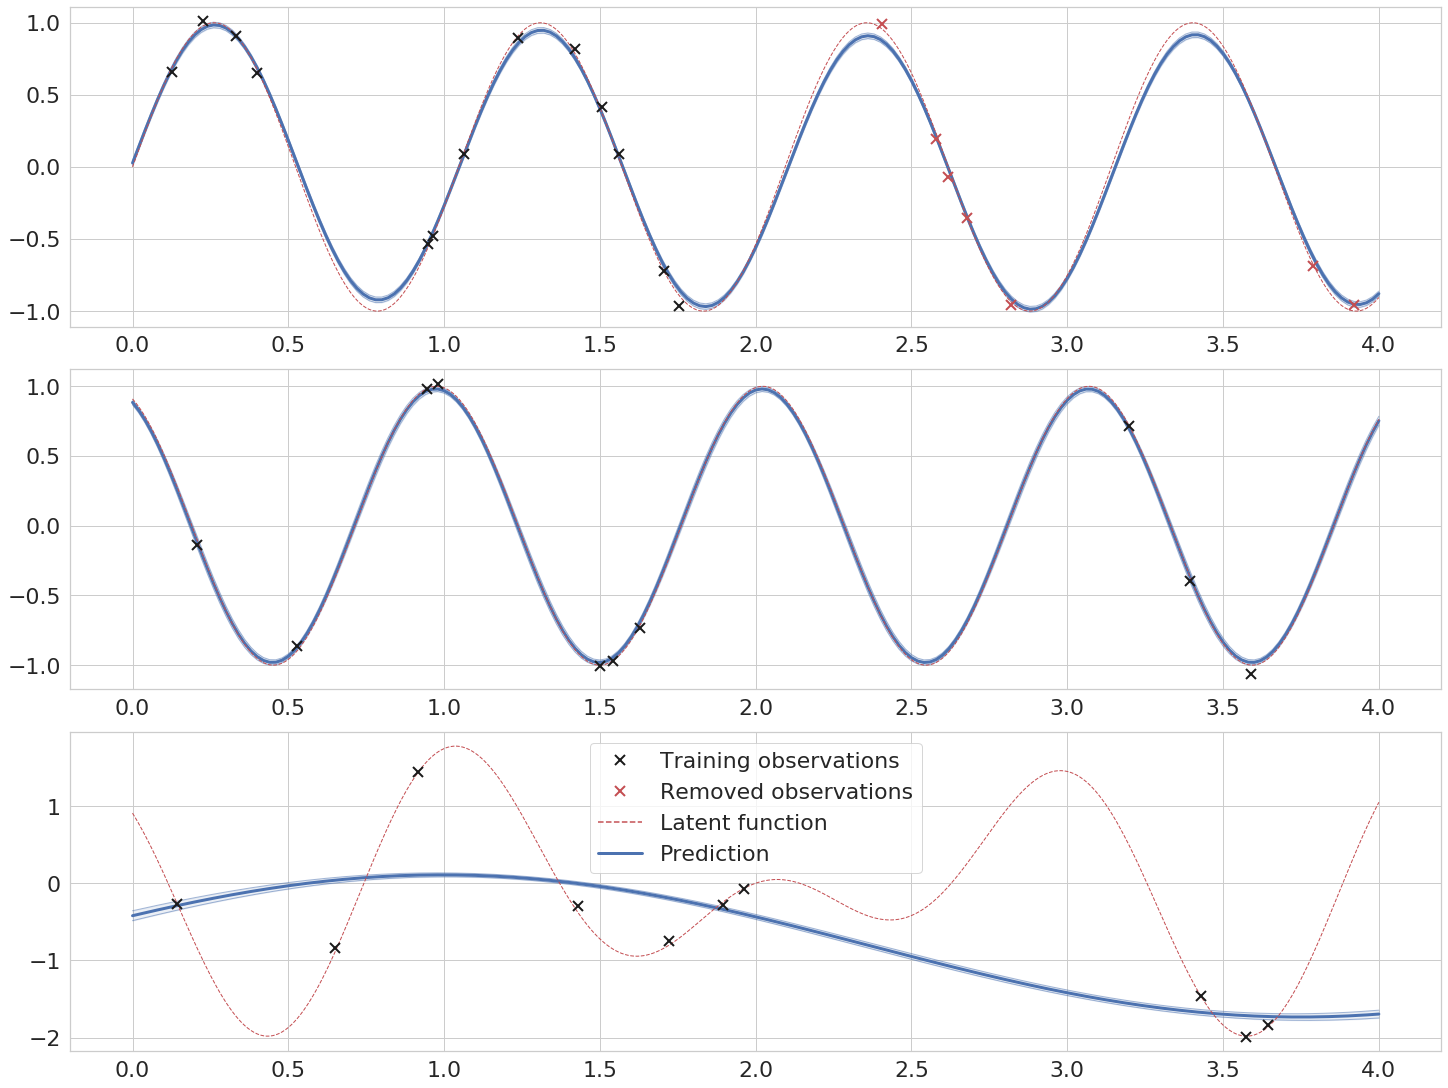

In [6]:
# create prediction range
model_mosm.set_prediction_range(channel=0, start=0, end=4, step=0.02)
model_mosm.set_prediction_range(channel=1, start=0, end=4, step=0.02)
model_mosm.set_prediction_range(channel=2, start=0, end=4, step=0.02)

# predict
model_mosm.predict()

mogptk.plot(model_mosm)

## CSM

In [7]:
kernel = mogptk.CSM(data, components=3)
model_csm = mogptk.Model(data, kernel)
model_csm.optimize()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 5.068837
  Number of iterations: 120
  Number of functions evaluations: 151


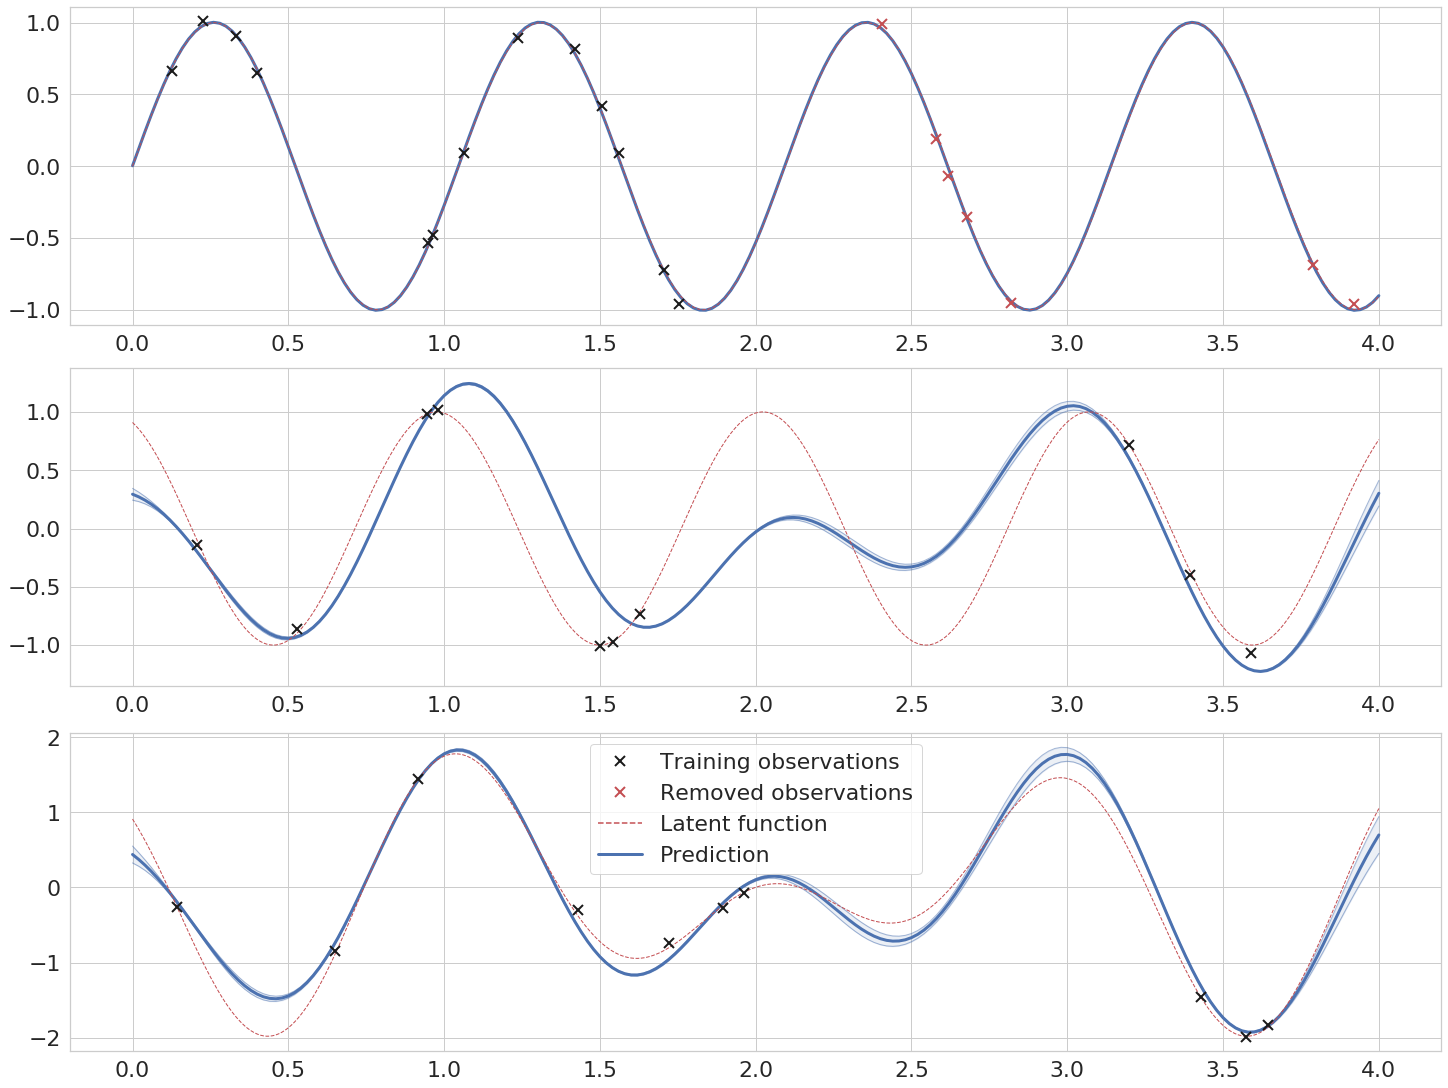

In [8]:
model_csm.set_prediction_range(channel=0, start=0, end=4, step=0.02)
model_csm.set_prediction_range(channel=1, start=0, end=4, step=0.02)
model_csm.set_prediction_range(channel=2, start=0, end=4, step=0.02)
model_csm.predict()

mogptk.plot(model_csm)

## CONV

In [9]:
kernel = mogptk.CG(data, components=3)
model_cg = mogptk.Model(data, kernel)
model_cg.optimize()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 38.449549
  Number of iterations: 91
  Number of functions evaluations: 106


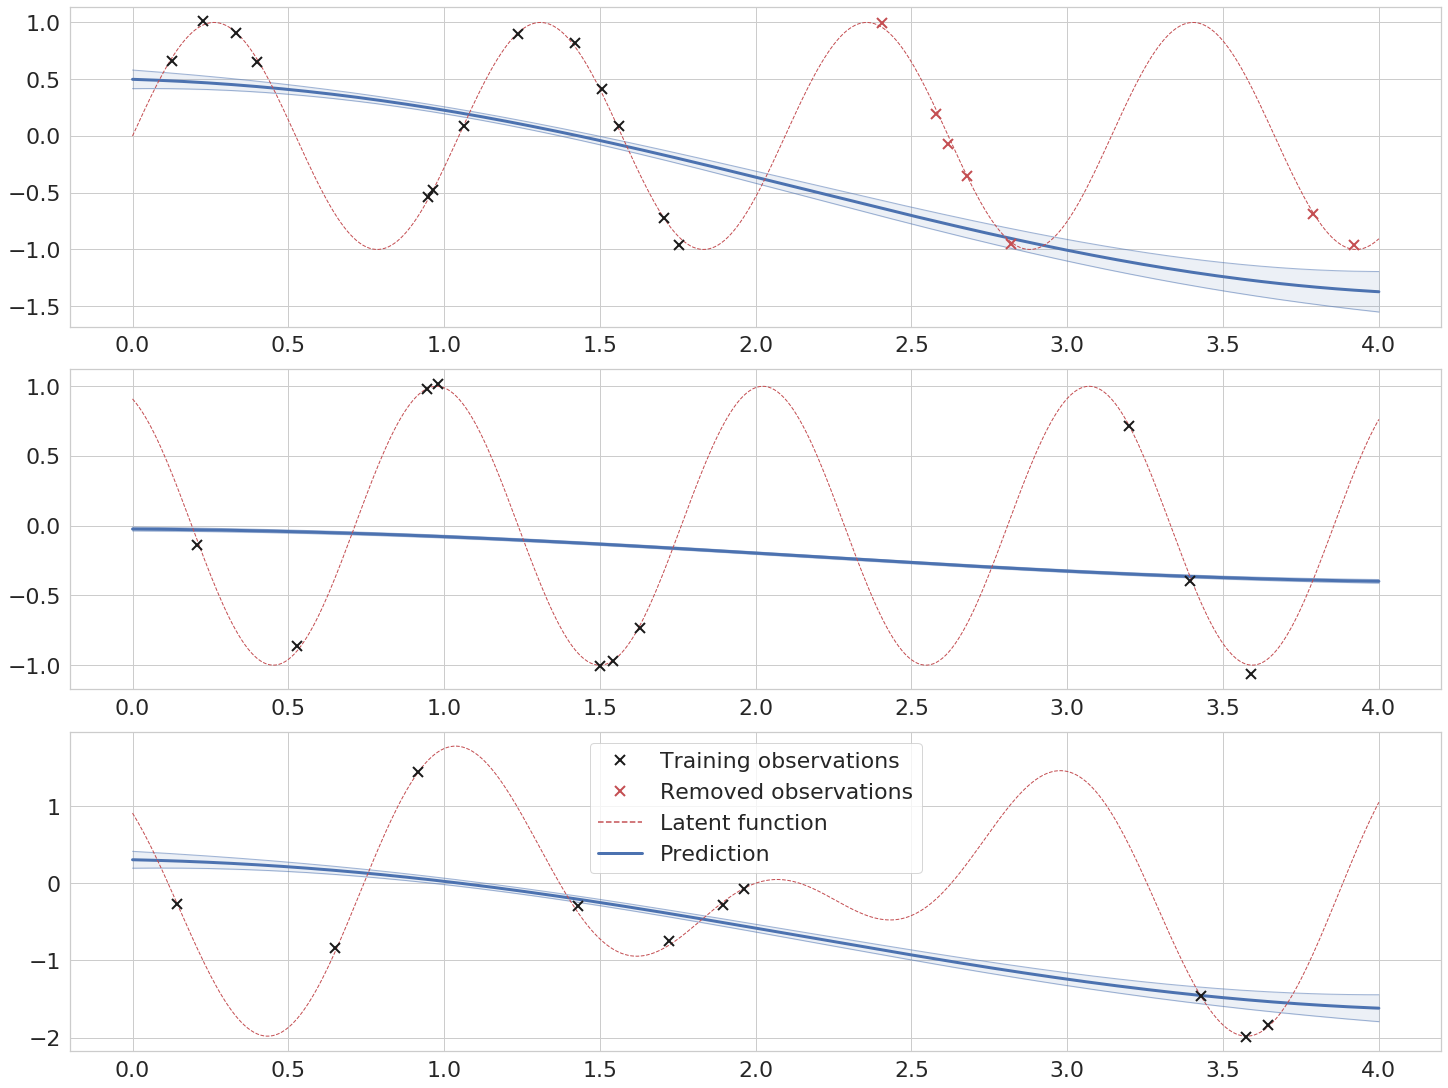

In [10]:
model_cg.set_prediction_range(channel=0, start=0, end=4, step=0.02)
model_cg.set_prediction_range(channel=1, start=0, end=4, step=0.02)
model_cg.set_prediction_range(channel=2, start=0, end=4, step=0.02)
model_cg.predict()

mogptk.plot(model_cg)

## SM-LMC

In [11]:
kernel = mogptk.SM_LMC(data, components=3)
model_smlmc = mogptk.Model(data, kernel)
model_smlmc.optimize()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -36.508485
  Number of iterations: 512
  Number of functions evaluations: 593


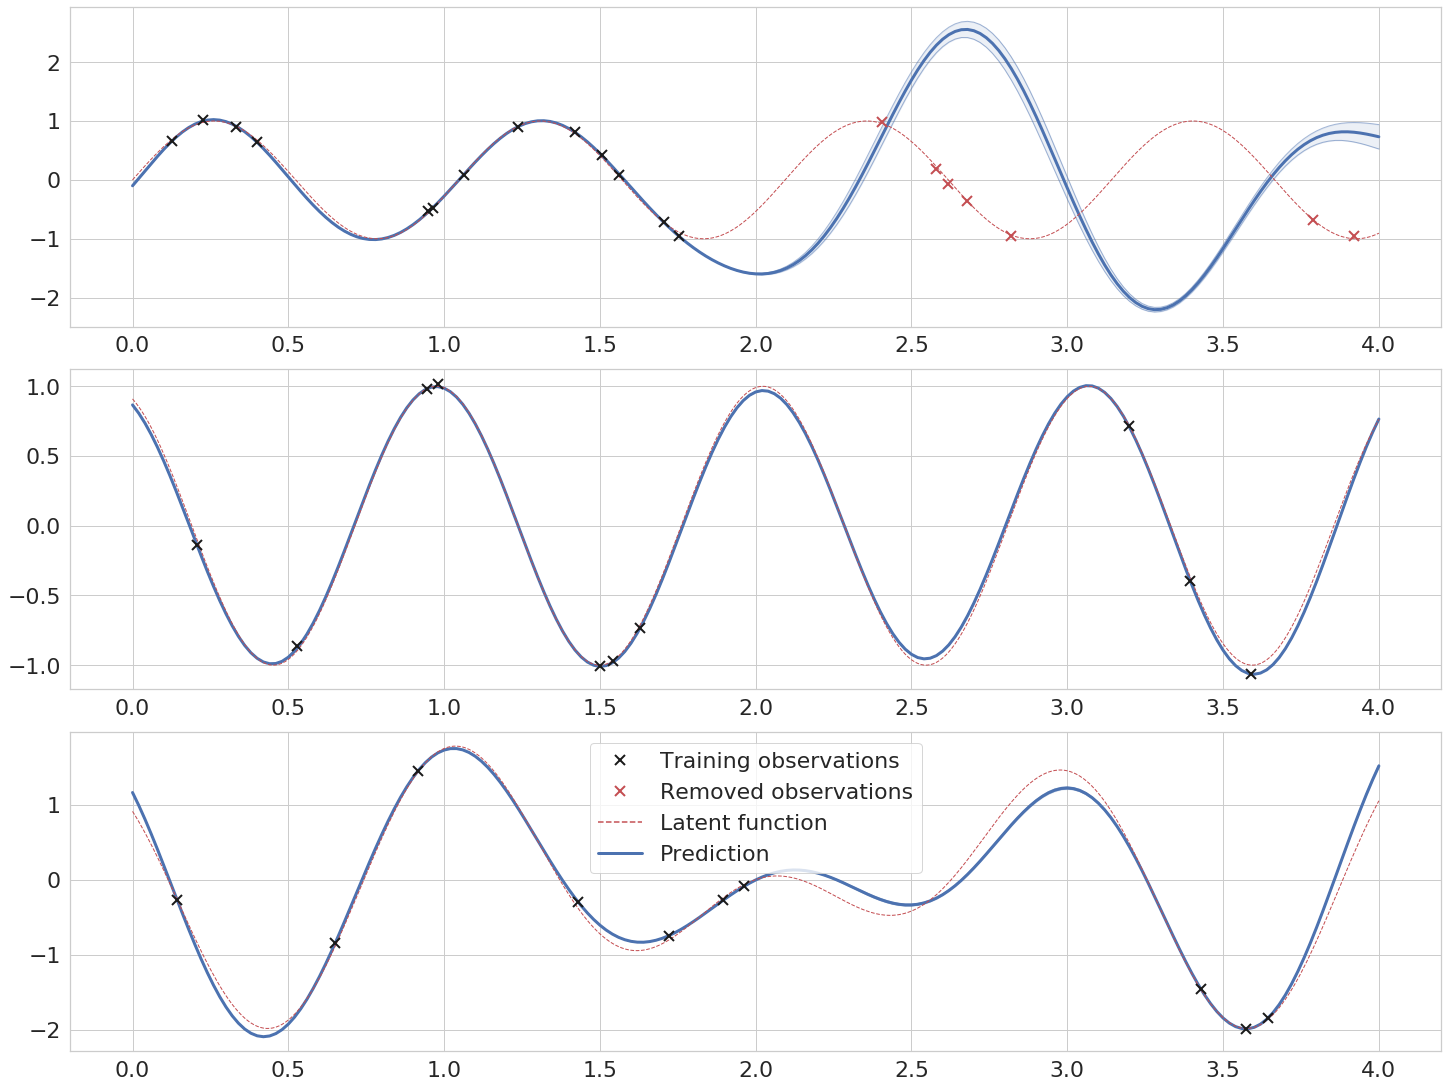

In [12]:
model_smlmc.set_prediction_range(channel=0, start=0, end=4, step=0.02)
model_smlmc.set_prediction_range(channel=1, start=0, end=4, step=0.02)
model_smlmc.set_prediction_range(channel=2, start=0, end=4, step=0.02)
model_smlmc.predict()

mogptk.plot(model_smlmc)

## Error estimation

In [13]:
mogptk.errors(model_mosm, model_csm, model_smlmc, model_cg, print=True)

,MAE,MSE
model,,
MOSM,0.045362,0.003464
CSM,0.030121,0.001249
SM-LMC,1.962222,4.613349
CG,0.691997,0.691631
